## **EDA :** Initiation with Red Wine Quality

#### _Red Wine Quality Dataset_

🟠 `on work`

---

* **Objectifs**
    * Découvrir l'analyse exploratoire de données
    * Prendre en main `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`

1. **Identification générale**
    * Structure
    * Valeurs cibles
    * Types de valeurs
    * Valeurs manquantes ou défectueuses
    * Préparation
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * ~~Variables quantitatives discrètes~~
    * ~~Variables qualitatives~~
3. **Analyse bivariée**
    * ..
4. **Finalisation**
    * Sélection de colonnes utiles
    * Exportation

**Built-in**

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**User functions**

**Notebook setup**

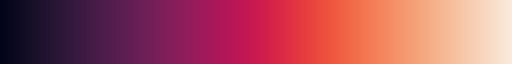

In [16]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#00cccc'
default_c = '#b3003b'

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display icefire, crest, mako, rocket, ...
sns.color_palette("rocket", as_cmap=True)

**Redwine dataset**

(_no url_)

In [4]:
redwine_file_path = '../_datasets/redwine_data.csv'
redwine_data = pd.read_csv(redwine_file_path)

redwine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


---
### **1.** Identification générale

##### **1.1** - Structure

In [5]:
# (!) - 1599 entries dispatched in 12 columns
redwine_data.shape

(1599, 12)

In [6]:
# (!) - Data complete and uniform in types
redwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### **1.2** - Valeurs cibles

In [7]:
# (!) - Target is 'quality' as ordinals between 1 = low and 9 = high
redwine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

##### **1.3** - Types de valeurs

In [8]:
# (!) - Only target as integers
redwine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# (!) - Max values in float
redwine_data.select_dtypes(np.float64).max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

##### **1.4** - Valeurs manquantes ou défectueuses

In [10]:
# (!) - No null
redwine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# (!) - 
redwine_data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

##### **1.5** - Préparation

* faciliter la manipulation et la **visualisation**
* explorer les possibilités `NumPy` et `Pandas`

In [12]:
# Format col. names
columns = {}
for col in redwine_data.columns :
    name = col.replace(' ', '_').lower()
    columns[f'{col}'] = name

# Apply
redwine_data = redwine_data.rename(columns=columns)

redwine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [13]:
# (!) - Extract features
features = redwine_data.select_dtypes(np.float64).columns.to_list()

features

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

---
### **2.** Analyse univariée

##### **2.1** - Cible

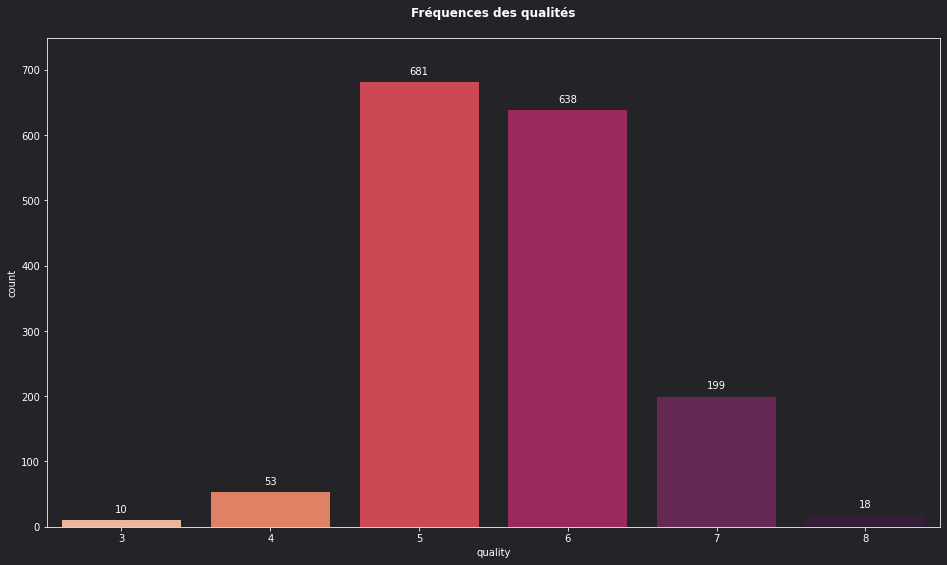

In [14]:
# (!) - Very balanced with high freq. in medium ranges
height = redwine_data['quality'].value_counts().max()

plt.figure(figsize=(16, 9))
plt.title("Fréquences des qualités\n")
ax = sns.countplot(data=redwine_data, x='quality', palette='rocket_r')
ax.bar_label(ax.containers[0], padding=6)
plt.ylim(top=height*1.1)
plt.show()

In [14]:
# (!) - Quality percentage for this dataset
count = redwine_data['quality'].value_counts()
percent = (count / redwine_data.shape[0]) * 100
quality_report = pd.DataFrame({'count':count,'percent':percent})

quality_report

,count,percent
5,681,42.589118
6,638,39.899937
7,199,12.445278
4,53,3.314572
8,18,1.125704
3,10,0.625391


##### **2.2** - Variables quantitatives continues

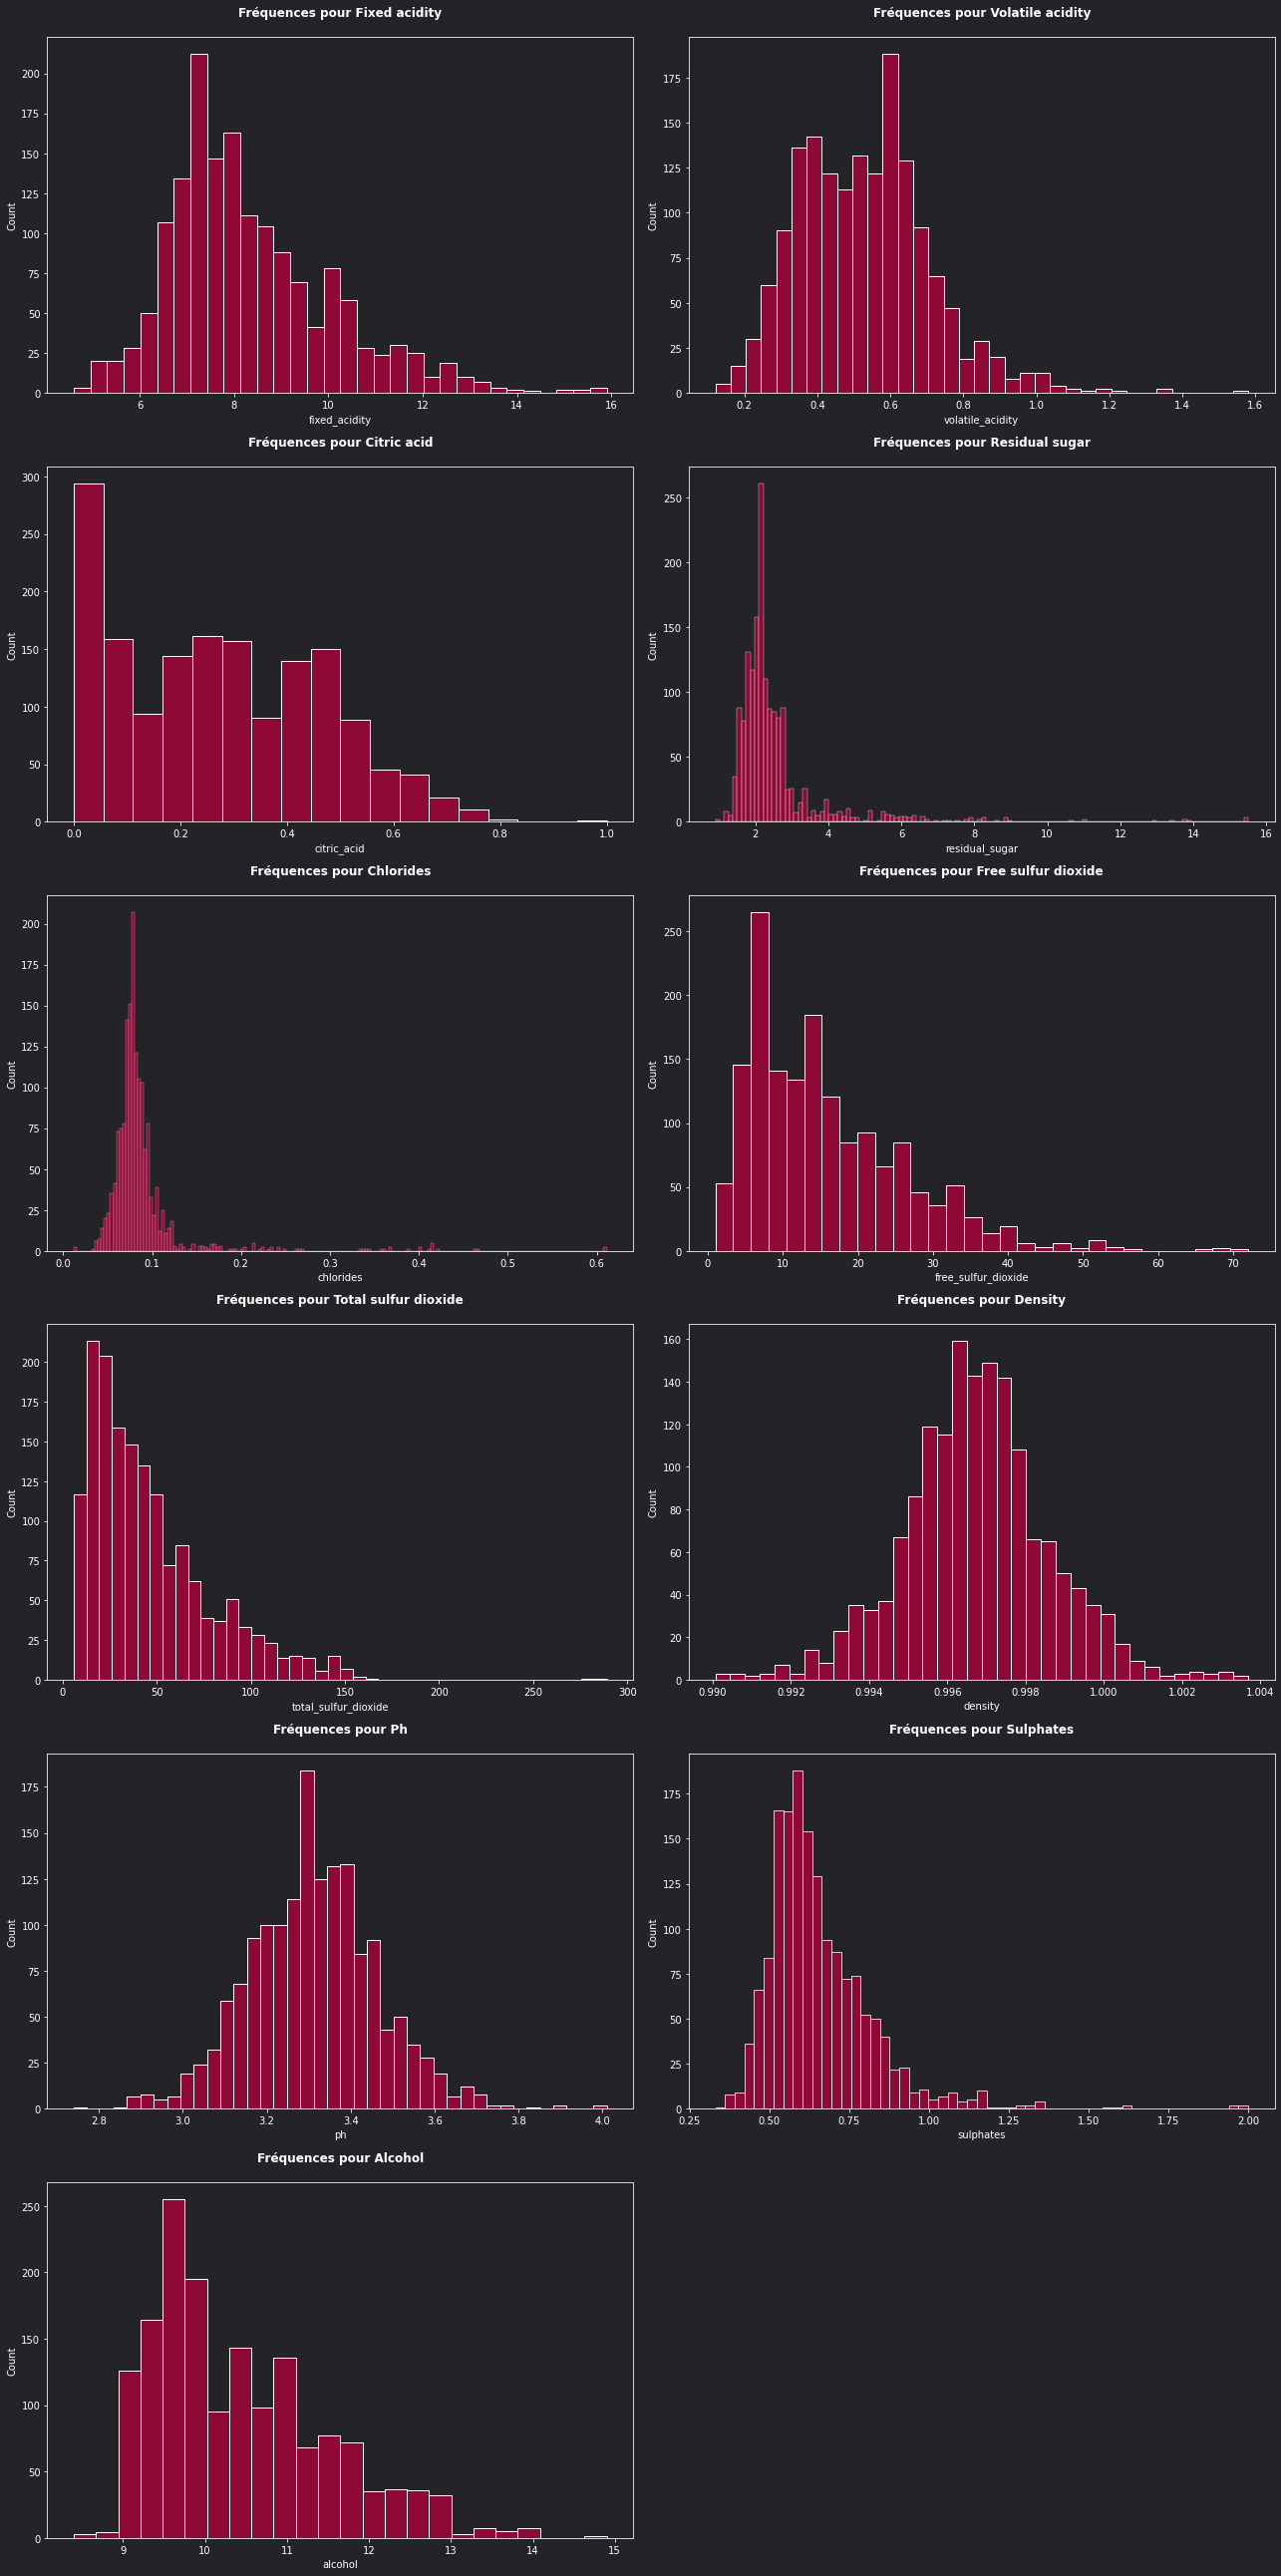

In [60]:
# (!) - 
plt.figure(figsize=(18, 36), layout='tight')
for i, col in enumerate(features) :
    plt.subplot(6, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=redwine_data, x=col, fill=True, color=default_c)
plt.show()

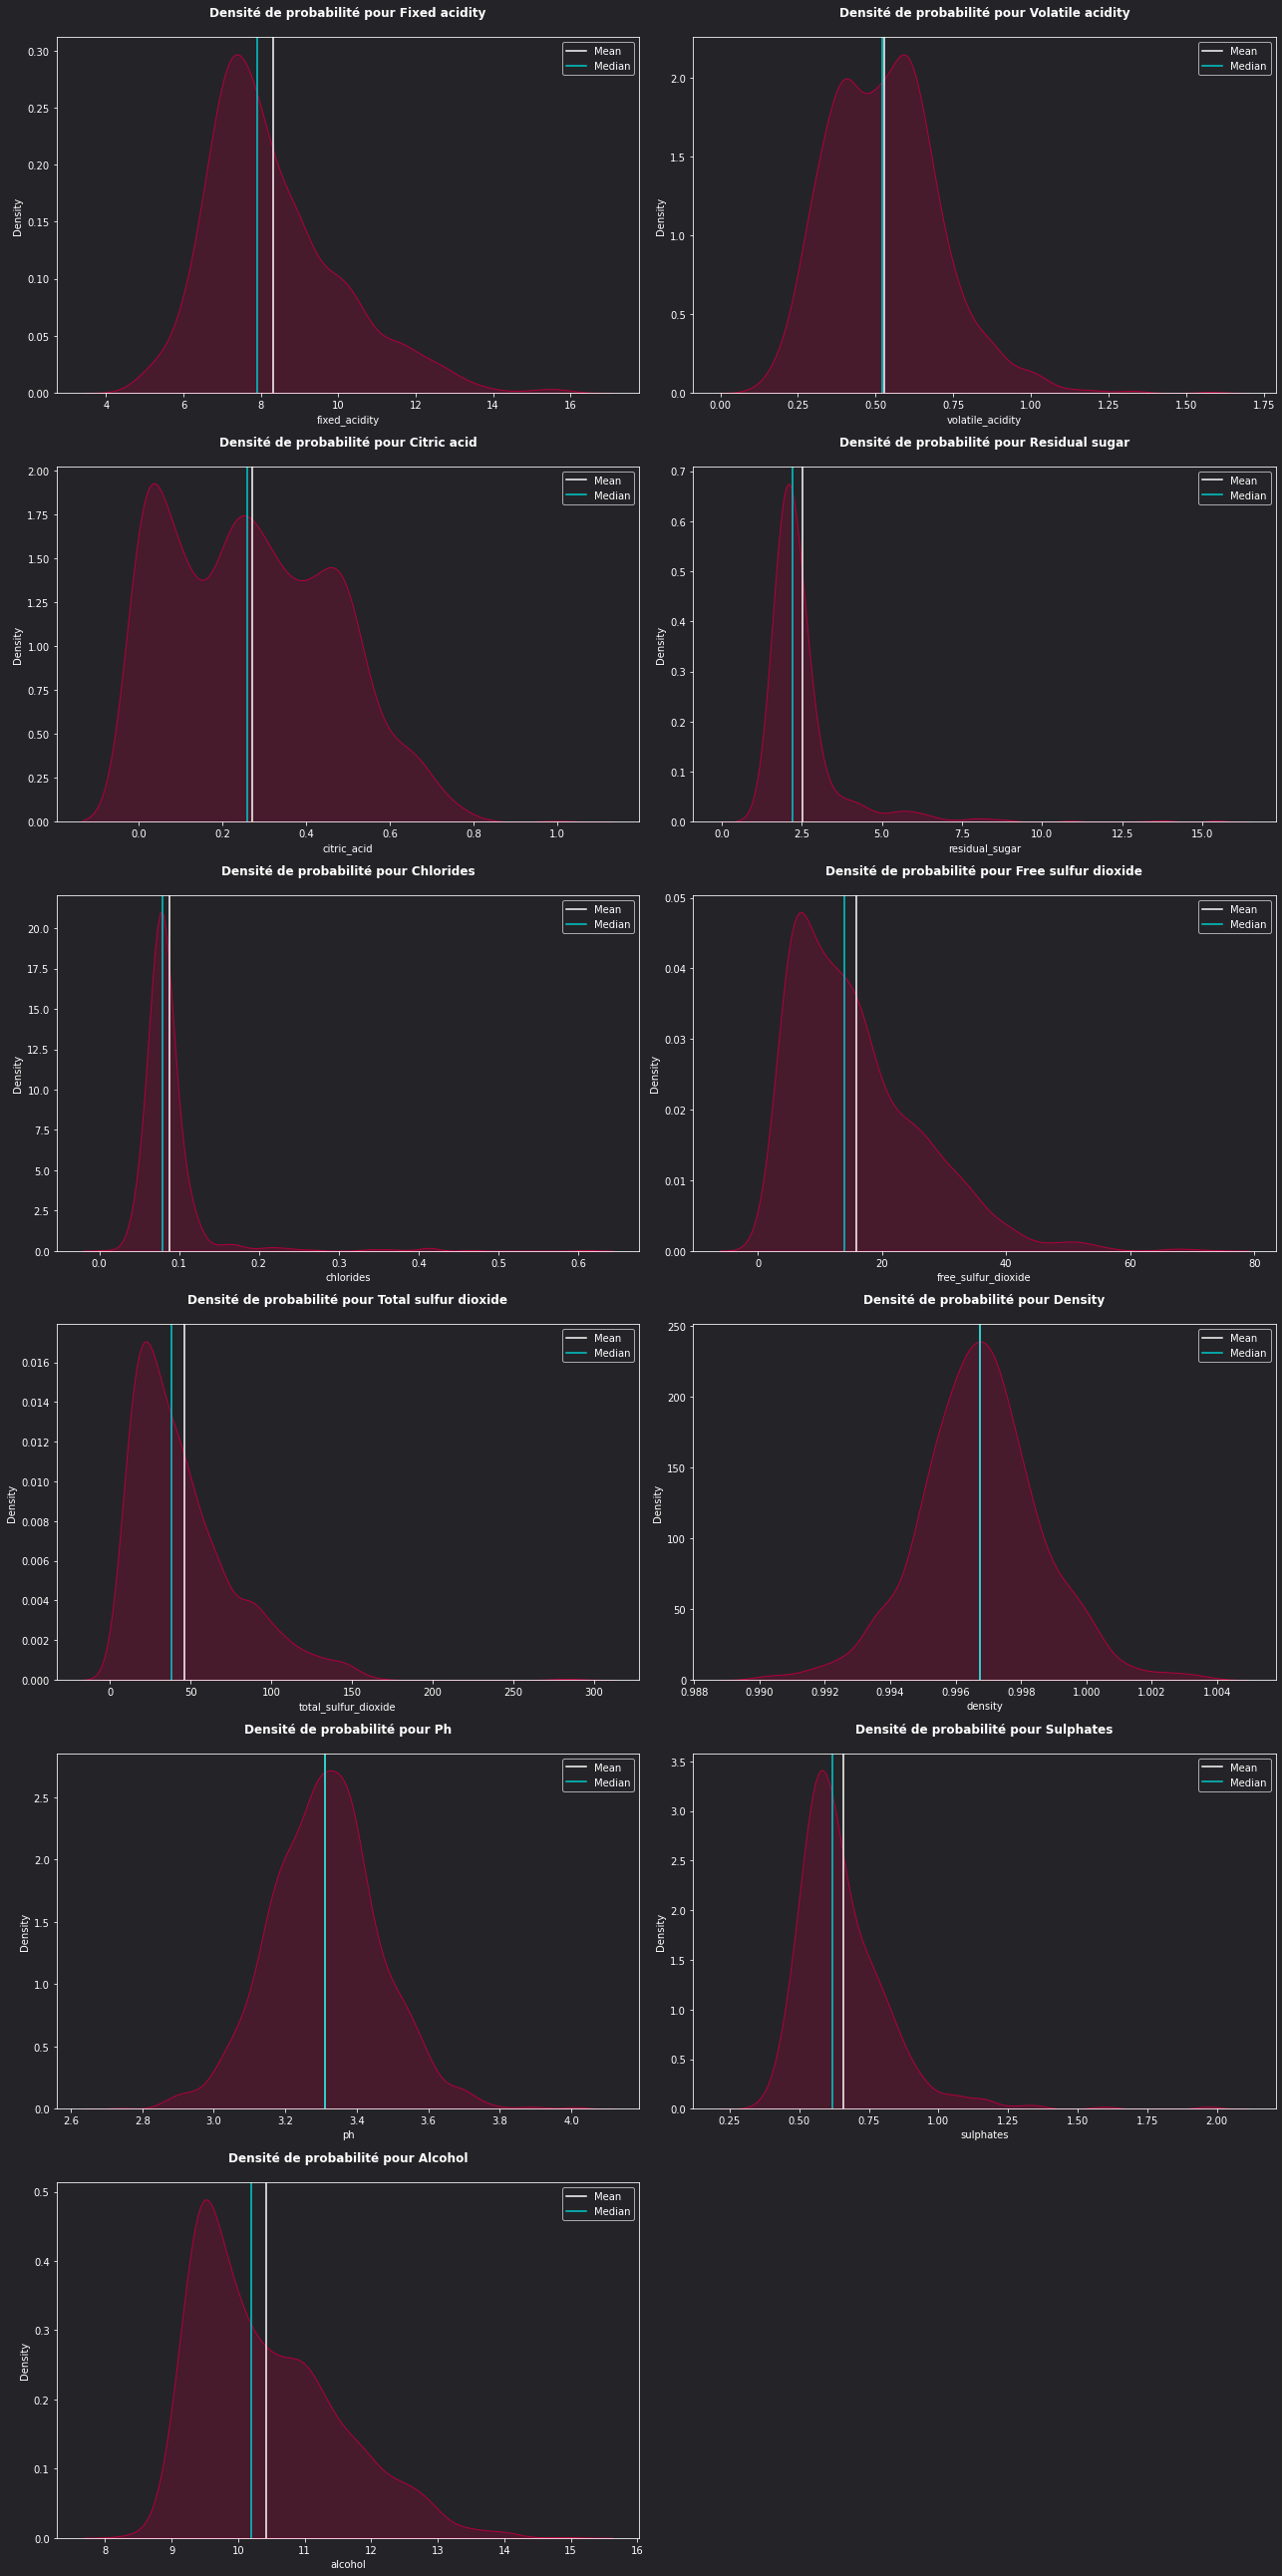

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [63]:
# (!) - 
plt.figure(figsize=(18, 36), layout='tight')
for i, col in enumerate(features) :
    plt.subplot(6, 2, i+1)
    plt.title(f"Densité de probabilité pour '{col}'\n")
    sns.kdeplot(data=redwine_data, x=col, fill=True, color=default_c)
    plt.axvline(redwine_data[col].mean(), c=mean_c, label='Mean')
    plt.axvline(redwine_data[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

redwine_data[features].describe().iloc[[1, 2, 3, 7]]

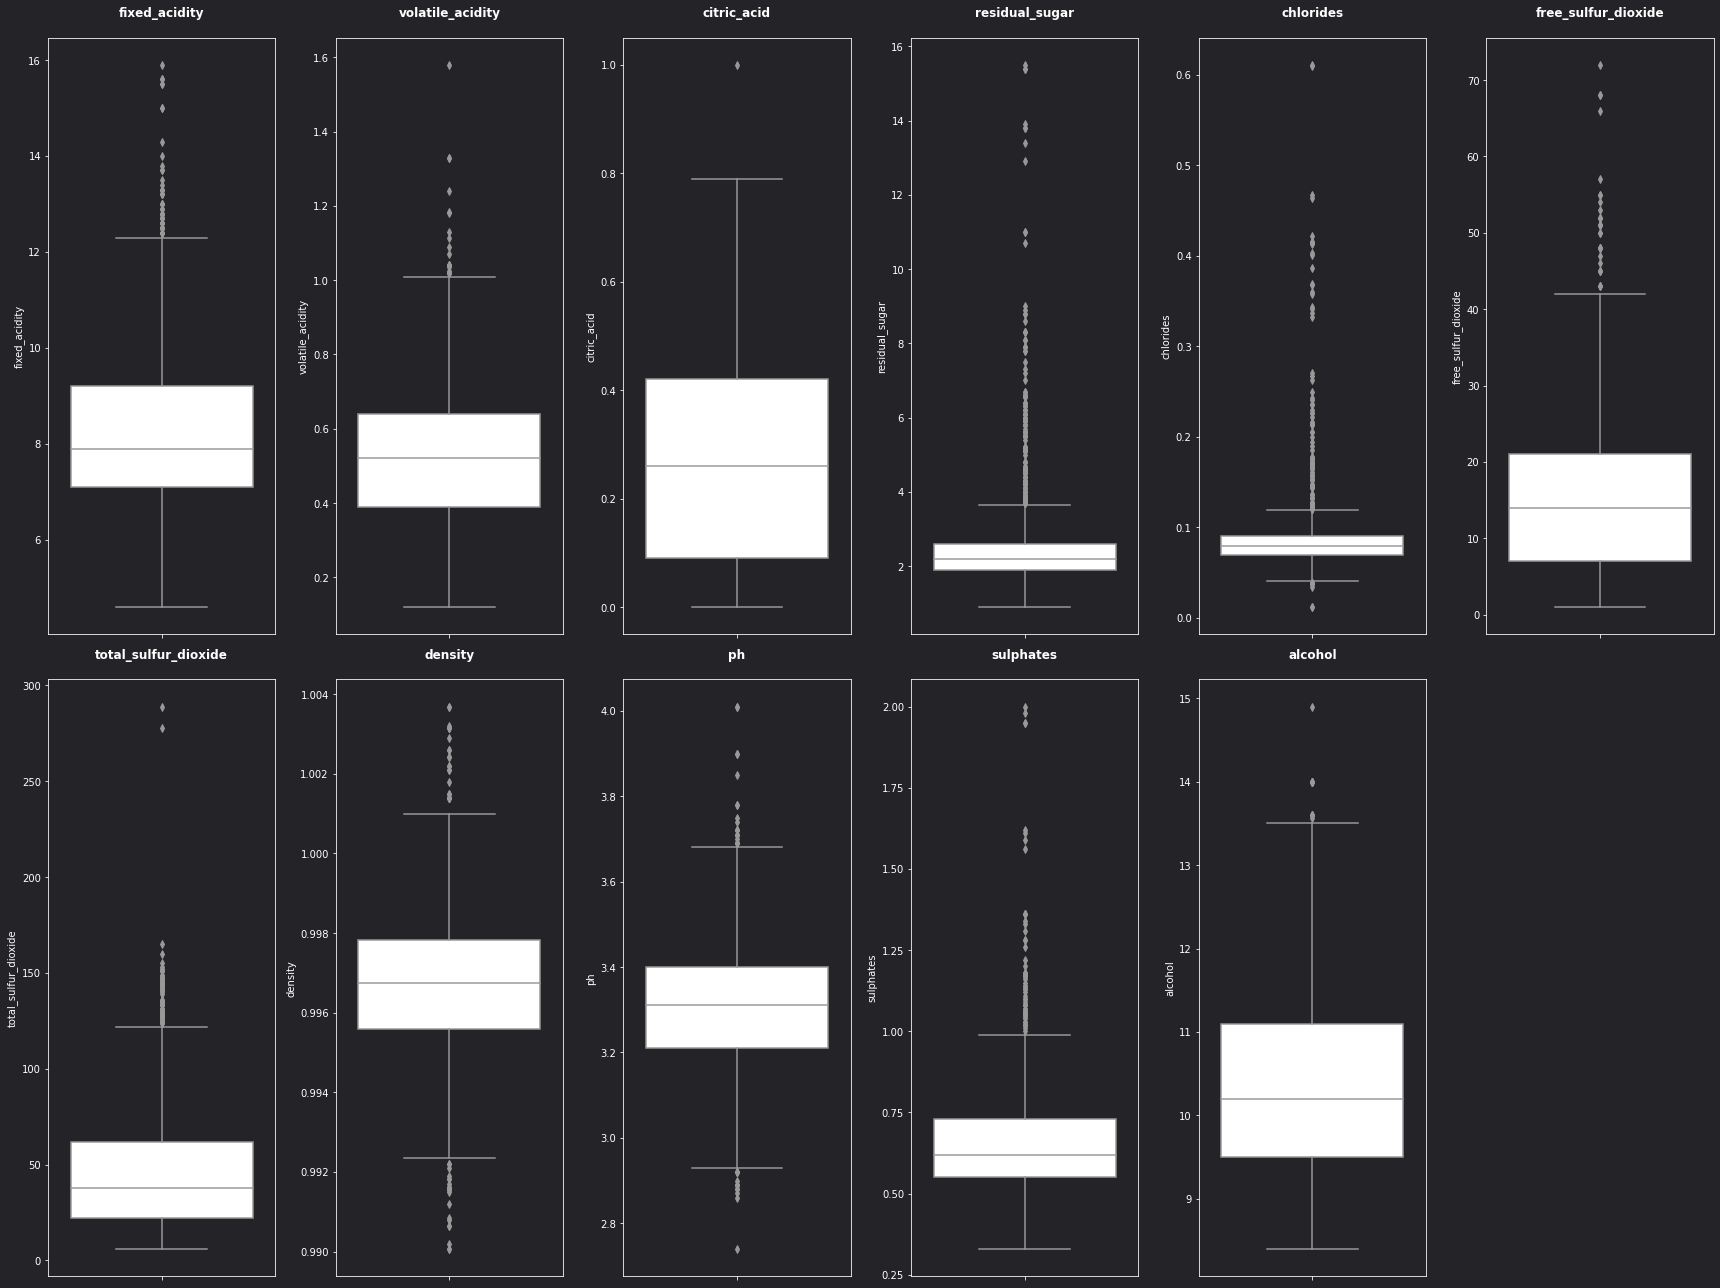

In [18]:
# (!) - 
plt.figure(figsize=(24, 18), layout='tight')
for i, col in enumerate(features) :
    plt.subplot(2, 6, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=redwine_data, y=col, color='#FFFFFF')
plt.show()

In [48]:
# Isolation of entries with outlied features (except 'citric_acid' and 'alcohol')
slct = [feature for feature in features if not feature in ['citric_acid', 'alcohol', 'ph']]
q25 = redwine_data[slct].quantile(.25)
q75 = redwine_data[slct].quantile(.75)
iqr = q75 - q25
lowers = q25 - (1.5 * iqr)
uppers = q75 + (1.5 * iqr)

In [ ]:
# Show lowers
# for col in slct :
#     print(f"'{col}' inférieurs à {lowers[col]:.3f}")
#     display(redwine_data.loc[redwine_data[col] < lowers[col]])

In [ ]:
# Show uppers
# for col in slct :
#     print(f"'{col}' supérieurs à {uppers[col]:.3f}")
#     display(redwine_data.loc[redwine_data[col] > uppers[col]])

##### **2.3** - ~~Variables quantitatives discrètes~~

##### **2.4** - ~~Variables qualitatives~~

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

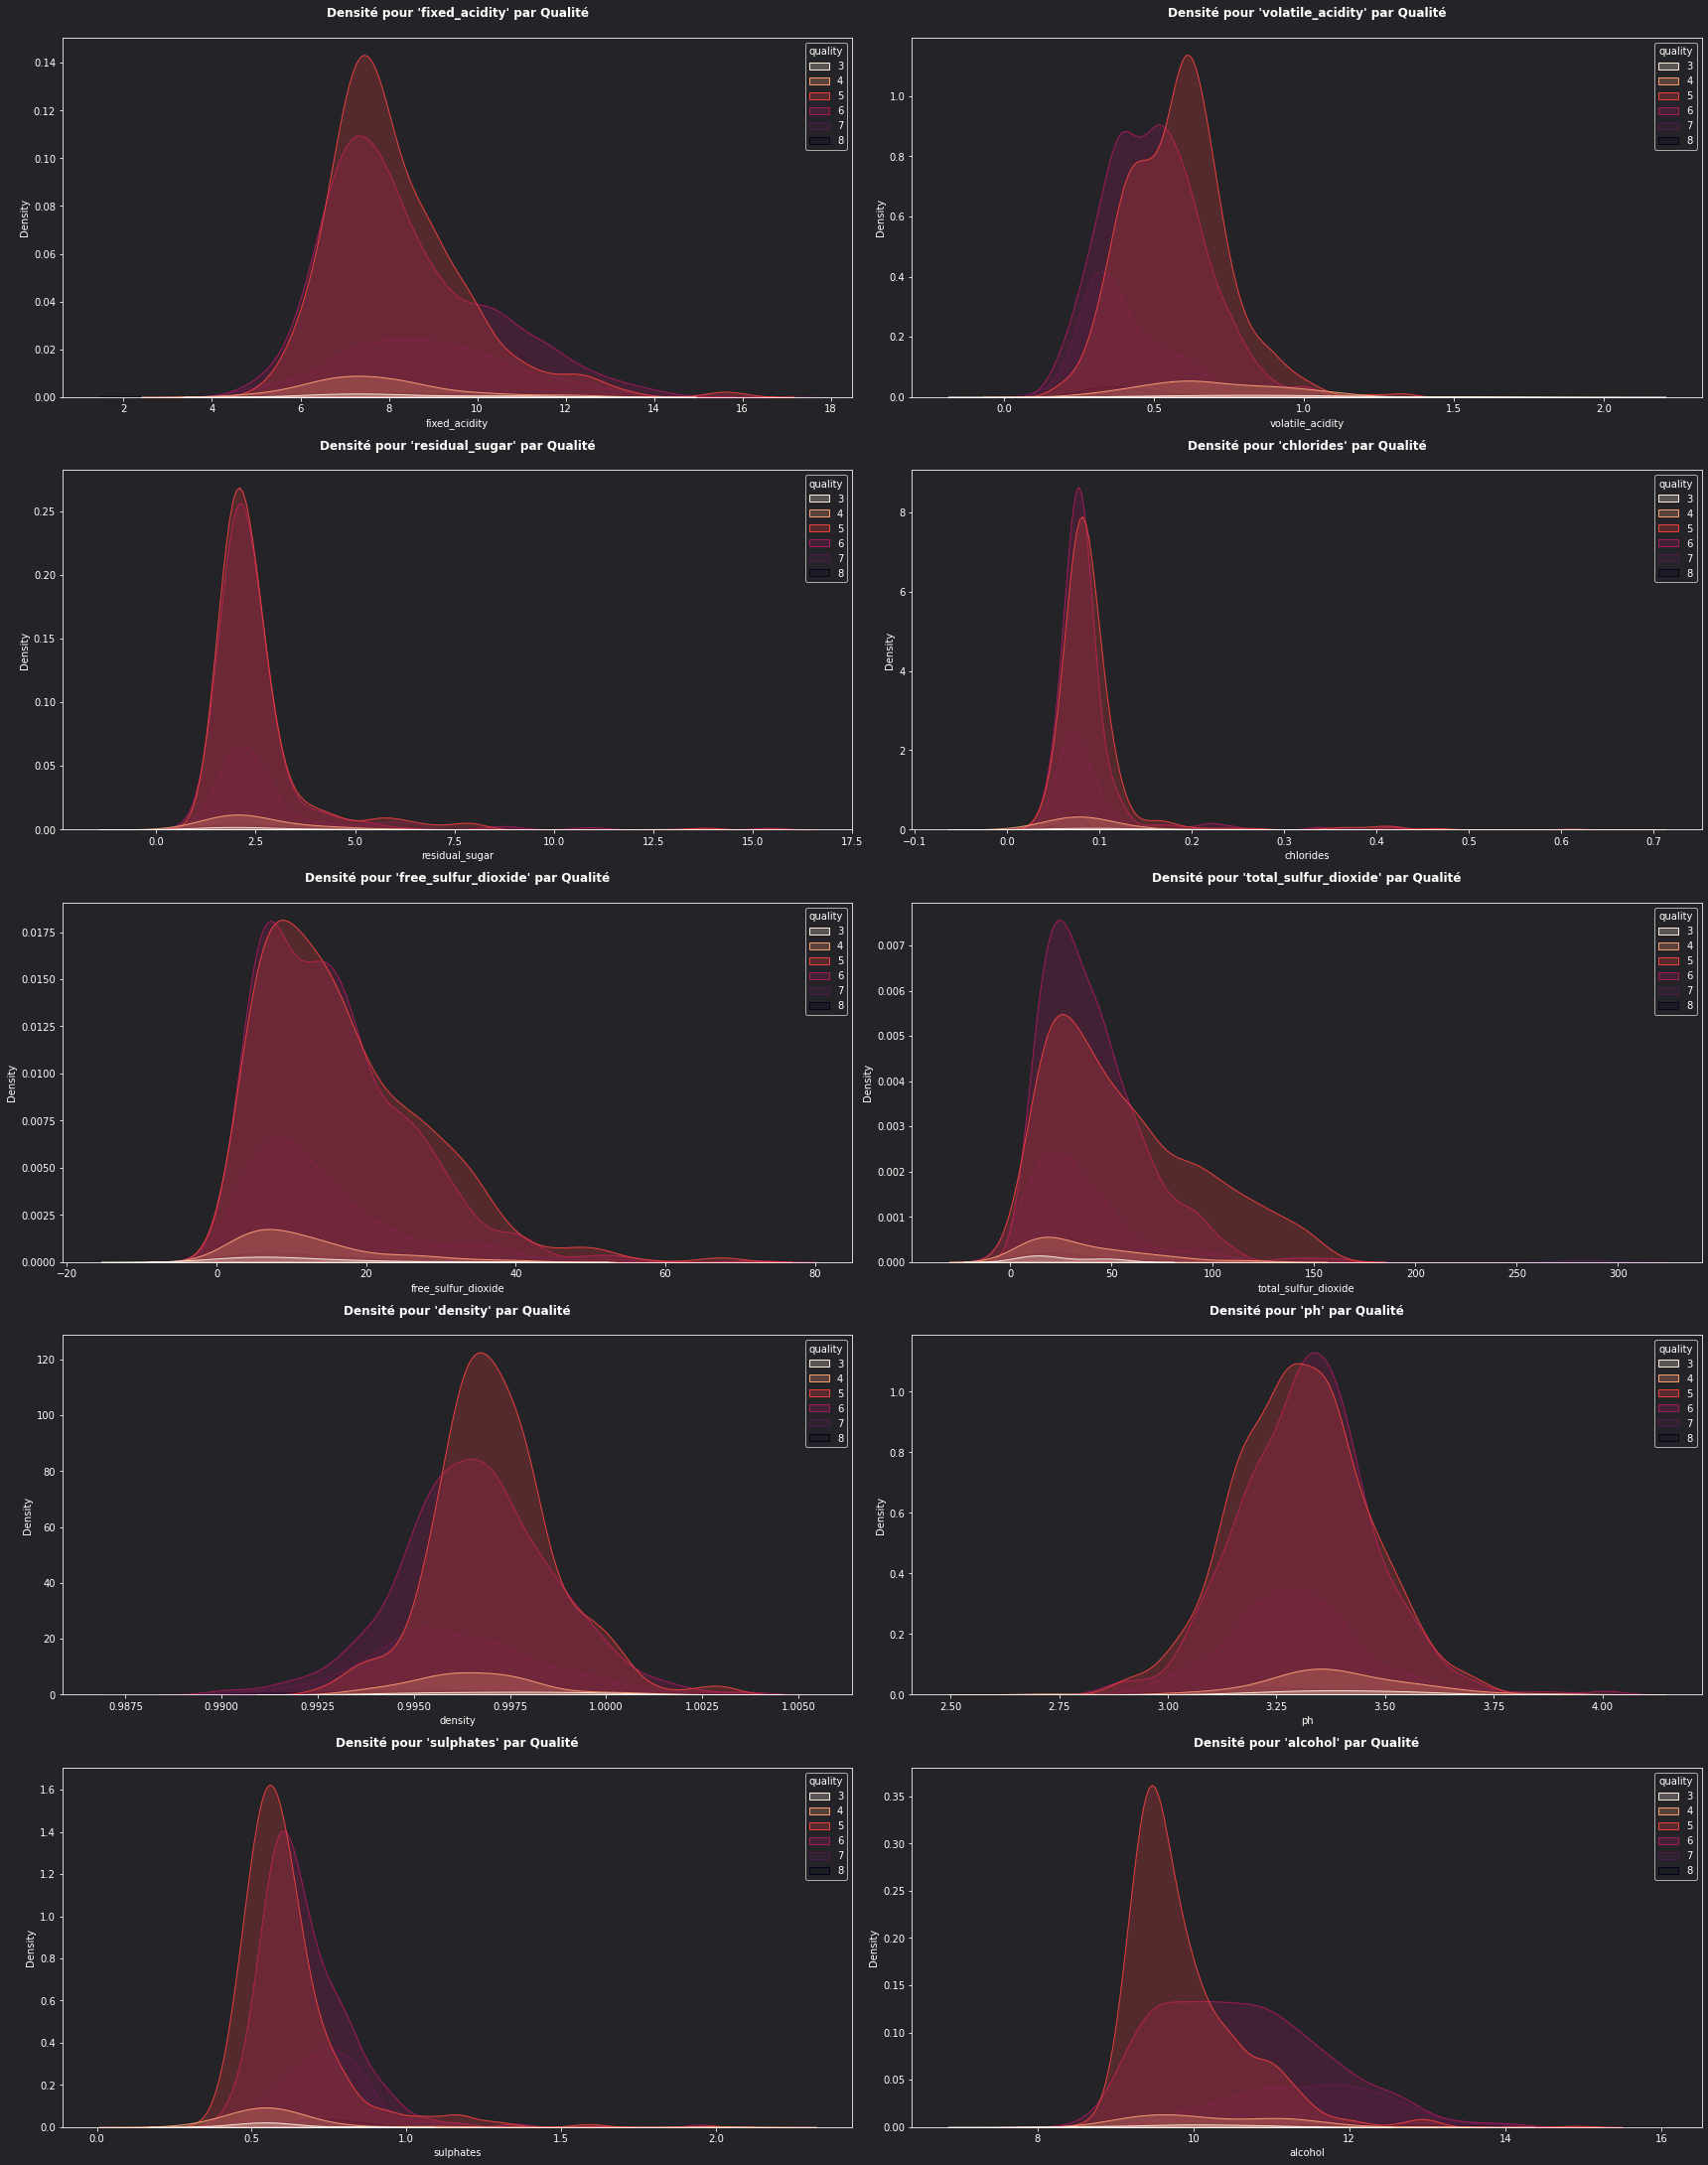

In [65]:
# (!) - 
plt.figure(figsize=(24, 36), layout='tight')
for i, col in enumerate(features) :
    plt.subplot(6, 2, i+1)
    plt.title(f"Densité pour '{col}' par Qualité\n")
    # common_norm : 
    #   If True, scale each conditional density by the number of observations such that the total area under all densities sums to 1. Otherwise, normalize each density independently.
    sns.kdeplot(data=redwine_data, x=col, hue='quality', fill=True, palette='rocket_r')

plt.show()

In [64]:
# (!) - 
for col in features :
    display(redwine_data[[col, 'quality']].groupby('quality').describe())

fixed_acidity                                                   
                count      mean       std  min   25%   50%     75%   max
quality                                                                 
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6

volatile_acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850

residual_sugar                                                 
                 count      mean       std  min    25%  50%   75%   max
quality                                                                
3                 10.0  2.635000  1.401596  1.2  1.875  2.1  3.10   5.7
4                 53.0  2.694340  1.789436  1.3  1.900  2.1  2.80  12.9
5                681.0  2.528855  1.359753  1.2  1.900  2.2  2.60  15.5
6                638.0  2.477194  1.441576  0.9  1.900  2.2  2.50  15.4
7                199.0  2.720603  1.371509  1.2  2.000  2.3  2.75   8.9
8                 18.0  2.577778  1.295038  1.4  1.800  2.1  2.60   6.4

chlorides                                                           
            count      mean       std    min      25%     50%     75%    max
quality                                                                     
3            10.0  0.122500  0.066241  0.061  0.07900  0.0905  0.1430  0.267
4            53.0  0.090679  0.076192  0.045  0.06700  0.0800  0.0890  0.610
5           681.0  0.092736  0.053707  0.039  0.07400  0.0810  0.0940  0.611
6           638.0  0.084956  0.039563  0.034  0.06825  0.0780  0.0880  0.415
7           199.0  0.076588  0.029456  0.012  0.06200  0.0730  0.0870  0.358
8            18.0  0.068444  0.011678  0.044  0.06200  0.0705  0.0755  0.086

free_sulfur_dioxide                                                  
                      count       mean        std  min  25%   50%   75%   max
quality                                                                      
3                      10.0  11.000000   9.763879  3.0  5.0   6.0  14.5  34.0
4                      53.0  12.264151   9.025926  3.0  6.0  11.0  15.0  41.0
5                     681.0  16.983847  10.955446  3.0  9.0  15.0  23.0  68.0
6                     638.0  15.711599   9.940911  1.0  8.0  14.0  21.0  72.0
7                     199.0  14.045226  10.175255  3.0  6.0  11.0  18.0  54.0
8                      18.0  13.277778  11.155613  3.0  6.0   7.5  16.5  42.0

total_sulfur_dioxide                                                \
                       count       mean        std   min   25%   50%   75%   
quality                                                                      
3                       10.0  24.900000  16.828877   9.0  12.5  15.0  42.5   
4                       53.0  36.245283  27.583374   7.0  14.0  26.0  49.0   
5                      681.0  56.513950  36.993116   6.0  26.0  47.0  84.0   
6                      638.0  40.869906  25.038250   6.0  23.0  35.0  54.0   
7                      199.0  35.020101  33.191206   7.0  17.5  27.0  43.0   
8                       18.0  33.444444  25.433240  12.0  16.0  21.5  43.0   

                
           max  
quality         
3         49.0  
4        119.0  
5        155.0  
6        165.0  
7        289.0  
8         88.0

density                                                             \
          count      mean       std      min       25%       50%       75%   
quality                                                                      
3          10.0  0.997464  0.002002  0.99471  0.996150  0.997565  0.998770   
4          53.0  0.996542  0.001575  0.99340  0.995650  0.996500  0.997450   
5         681.0  0.997104  0.001589  0.99256  0.996200  0.997000  0.997900   
6         638.0  0.996615  0.002000  0.99007  0.995402  0.996560  0.997893   
7         199.0  0.996104  0.002176  0.99064  0.994765  0.995770  0.997360   
8          18.0  0.995212  0.002378  0.99080  0.994175  0.994940  0.997200   

                  
             max  
quality           
3        1.00080  
4        1.00100  
5        1.00315  
6        1.00369  
7        1.00320  
8        0.99880

ph                                                     
         count      mean       std   min     25%   50%    75%   max
quality                                                            
3         10.0  3.398000  0.144052  3.16  3.3125  3.39  3.495  3.63
4         53.0  3.381509  0.181441  2.74  3.3000  3.37  3.500  3.90
5        681.0  3.304949  0.150618  2.88  3.2000  3.30  3.400  3.74
6        638.0  3.318072  0.153995  2.86  3.2200  3.32  3.410  4.01
7        199.0  3.290754  0.150101  2.92  3.2000  3.28  3.380  3.78
8         18.0  3.267222  0.200640  2.88  3.1625  3.23  3.350  3.72

sulphates                                                      
            count      mean       std   min     25%    50%    75%   max
quality                                                                
3            10.0  0.570000  0.122020  0.40  0.5125  0.545  0.615  0.86
4            53.0  0.596415  0.239391  0.33  0.4900  0.560  0.600  2.00
5           681.0  0.620969  0.171062  0.37  0.5300  0.580  0.660  1.98
6           638.0  0.675329  0.158650  0.40  0.5800  0.640  0.750  1.95
7           199.0  0.741256  0.135639  0.39  0.6500  0.740  0.830  1.36
8            18.0  0.767778  0.115379  0.63  0.6900  0.740  0.820  1.10

alcohol                                                        
          count       mean       std  min     25%     50%     75%   max
quality                                                                
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0